外れ値除去前データ数: 188
外れ値除去後データ数: 188

線形回帰モデルの式:
Reflectance =  0.2133×R +0.0171×G +0.3639×B + 3.9663


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 23556 (\N{CJK U


線形回帰 の評価:
  平均二乗誤差 (MSE): 32.8461
  決定係数 (R2スコア): 0.9698

ランダムフォレスト回帰 の評価:
  平均二乗誤差 (MSE): 30.3024
  決定係数 (R2スコア): 0.9721


findfont: Font family 'IPAexGothic' not found.
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  plt.tight_layout()
findfont: Font family 'IPAexGothic' not found.
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ipykernel_37800\901868798.py:134: UserWarning: Glyph 24112 (\N{CJK UNIFIED IDEOGRAPH-5E30}) missing from current font.
  plt.tight_layout()
C:\Users\harut\AppData\Local\Temp\ip

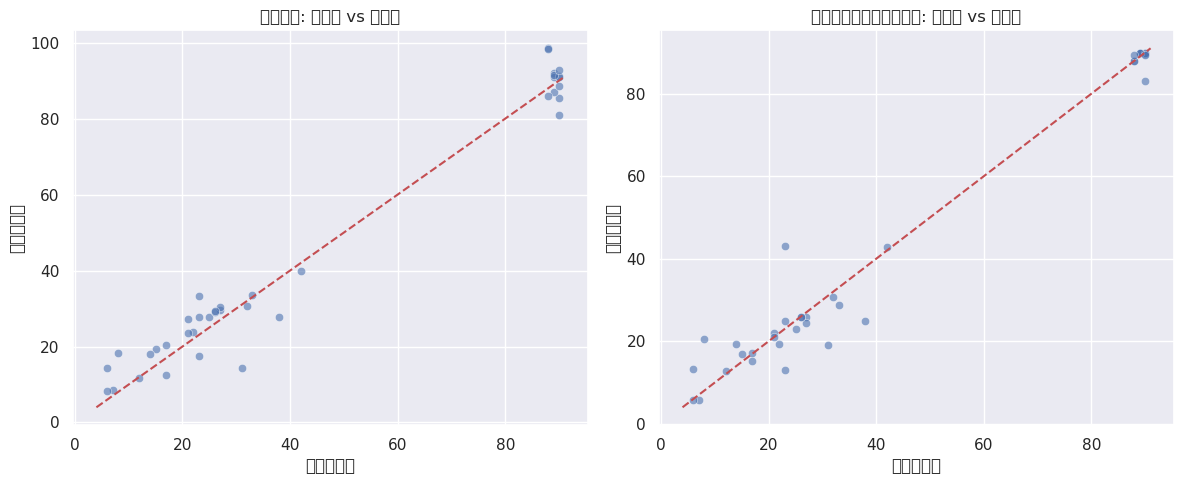

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# -------------------------------
# 日本語フォント設定（文字化け対策）
# -------------------------------
matplotlib.rcParams['font.family'] = 'IPAexGothic'  # または 'Yu Gothic', 'Noto Sans CJK JP' など
sns.set(font='IPAexGothic')  # seabornにも反映

# -------------------------------
# ファイル読み込み & 整形関数
# -------------------------------
def load_reflectance_rgb_data(filepath):
    reflectances = []
    rgbs = []

    with open(filepath, 'r') as file:
        lines = file.readlines()

        for i in range(0, len(lines), 2):
            reflectance_line = lines[i].strip().rstrip(',')
            reflectance = float(reflectance_line)

            rgb_line = lines[i+1].strip()
            rgb_values = list(map(int, rgb_line.split(',')))

            reflectances.append(reflectance)
            rgbs.append(rgb_values)

    df = pd.DataFrame(rgbs, columns=['R', 'G', 'B'])
    df['Reflectance'] = reflectances
    return df

# -------------------------------
# 外れ値除去（IQR法）
# -------------------------------
def remove_outliers_iqr(df):
    clean_df = df.copy()
    for col in ['R', 'G', 'B', 'Reflectance']:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    return clean_df

# -------------------------------
# データ読み込みと前処理
# -------------------------------
black = load_reflectance_rgb_data('./dataset/blackdata.csv')
blue = load_reflectance_rgb_data('./dataset/bluedata.csv')
white = load_reflectance_rgb_data('./dataset/whitedata.csv')

df = pd.concat([black, blue, white], ignore_index=True)
print(f'外れ値除去前データ数: {len(df)}')

df = remove_outliers_iqr(df)
print(f'外れ値除去後データ数: {len(df)}')

# 特徴量と目的変数を分離
X = df[['R', 'G', 'B']]
y = df['Reflectance']

# 学習用・テスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 線形回帰モデル
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 回帰係数の取得
coefficients = lr.coef_
intercept = lr.intercept_
features = ['R', 'G', 'B']

# 式の表示
print("\n線形回帰モデルの式:")
formula = "Reflectance = "
for i, (feat, coef) in enumerate(zip(features, coefficients)):
    sign = "+" if coef >= 0 and i > 0 else ""
    formula += f" {sign}{coef:.4f}×{feat}"
formula += f" + {intercept:.4f}"
print(formula)

# -------------------------------
# ランダムフォレスト回帰（非線形）
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# -------------------------------
# 評価関数
# -------------------------------
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} の評価:")
    print(f"  平均二乗誤差 (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"  決定係数 (R2スコア): {r2_score(y_true, y_pred):.4f}")

evaluate(y_test, y_pred_lr, "線形回帰")
evaluate(y_test, y_pred_rf, "ランダムフォレスト回帰")

# -------------------------------
# 結果の可視化
# -------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("線形回帰: 実測値 vs 予測値")
plt.xlabel("実測反射率")
plt.ylabel("予測反射率")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("ランダムフォレスト回帰: 実測値 vs 予測値")
plt.xlabel("実測反射率")
plt.ylabel("予測反射率")

plt.tight_layout()
plt.show()


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.



最も良かった変換の組み合わせ（R² = 0.9715）:
  x^2(R) × 0.0028
  x^3(G) × -0.0000
  x(B) × 0.4808
  切片: 2.4277


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

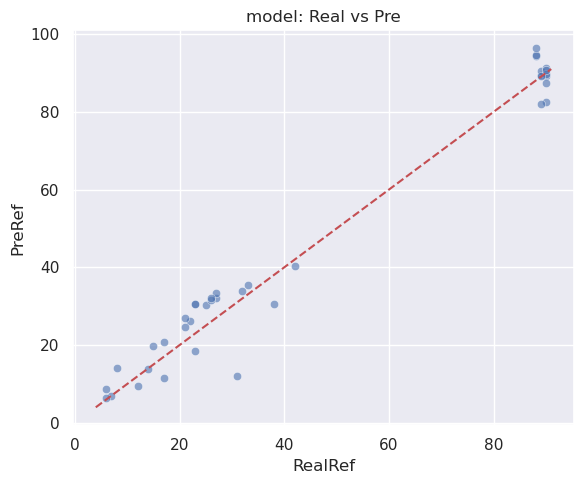

In [17]:
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

# -------------------------------
# 特徴量変換関数セット
# -------------------------------
transforms = {
    'x': lambda x: x,
    'x^2': lambda x: np.power(x, 2),
    'x^3': lambda x: np.power(x, 3),
    'log(x)': lambda x: np.log1p(x),   # log(1 + x)
    'sqrt(x)': lambda x: np.sqrt(x),
}

# 変換の全組み合わせ（R, G, Bに対して）
combinations = list(product(transforms.items(), repeat=3))

# 最良の結果を記録
best_score = -np.inf
best_combo = None
best_model = None
best_X_transformed = None


# 全パターン試す
for combo in combinations:
    feature_names = []
    X_transformed = pd.DataFrame()

    for i, (name, func) in enumerate(combo):
        col = ['R', 'G', 'B'][i]
        new_col = f"{name}({col})"
        feature_names.append(new_col)
        X_transformed[new_col] = func(X[col])

    # データ分割・回帰・評価
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))

    if score > best_score:
        best_score = score
        best_combo = feature_names
        best_model = model
        best_X_transformed = X_transformed

# -------------------------------
# 結果の表示
# -------------------------------
print(f"\n最も良かった変換の組み合わせ（R² = {best_score:.4f}）:")
for name, coef in zip(best_combo, best_model.coef_):
    print(f"  {name} × {coef:.4f}")
print(f"  切片: {best_model.intercept_:.4f}")

# 最適モデルによる予測 vs 実測の可視化
plt.figure(figsize=(6, 5))
y_pred_best = best_model.predict(best_X_transformed.loc[X_test.index])
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("model: Real vs Pre")
plt.xlabel("RealRef")
plt.ylabel("PreRef")
plt.tight_layout()
plt.show()


In [25]:
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

# -------------------------------
# 特徴量変換関数セット
# -------------------------------
transforms = {
    'x': lambda x: x,
    'x^2': lambda x: np.power(x, 2),
    'x^3': lambda x: np.power(x, 3),
    'log(x)': lambda x: np.log1p(x),   # log(1 + x)
    'sqrt(x)': lambda x: np.sqrt(x),
}

# 変換の全組み合わせ（R, G, Bに対して）
combinations = list(product(transforms.items(), repeat=3))

# -------------------------------
# データ読み込みと前処理
# -------------------------------
black = load_reflectance_rgb_data('../dataset/blackdata.csv')
blue = load_reflectance_rgb_data('../dataset/bluedata.csv')
white = load_reflectance_rgb_data('../dataset/whitedata.csv')

df = pd.concat([black, blue, white], ignore_index=True)
print(f'外れ値除去前データ数: {len(df)}')

df = remove_outliers_iqr(df)
print(f'外れ値除去後データ数: {len(df)}')

# 特徴量と目的変数を分離
X = df[['R', 'G', 'B']]
y = df['Reflectance']

# 学習用・テスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 最良の結果を記録
best_score = -np.inf
best_combo = None
best_model = None


# 全パターン試す
for combo in combinations:
    feature_names = []

    for i, (name, func) in enumerate(combo):
        col = ['R', 'G', 'B'][i]
        new_col = f"{name}({col})"
        feature_names.append(new_col)

    # データ分割・回帰・評価
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))

    if score > best_score:
        best_score = score
        best_combo = feature_names
        best_model = model

# -------------------------------
# 結果の表示
# -------------------------------
print(f"\n最も良かった変換の組み合わせ（R² = {best_score:.4f}）:")
for name, coef in zip(best_combo, best_model.coef_):
    print(f"  {name} × {coef:.4f}")
print(f"  切片: {best_model.intercept_:.4f}")



外れ値除去前データ数: 188
外れ値除去後データ数: 188

最も良かった変換の組み合わせ（R² = 0.9698）:
  x(R) × 0.2133
  x(G) × 0.0171
  x(B) × 0.3639
  切片: 3.9663


In [7]:
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RepeatedKFold
import warnings
import random

warnings.filterwarnings("ignore")

# -----------------------------------
# 特徴量生成関数群
# -----------------------------------
def gen_features(X):
    features = {
        'R': X[:, 0],
        'G': X[:, 1],
        'B': X[:, 2],
        'R^2': X[:, 0]**2,
        'G^2': X[:, 1]**2,
        'B^2': X[:, 2]**2,
        'R^3': X[:, 0]**3,
        'G^3': X[:, 1]**3,
        'B^3': X[:, 2]**3,
        'log(R)': np.log1p(X[:, 0]),
        'log(G)': np.log1p(X[:, 1]),
        'log(B)': np.log1p(X[:, 2]),
        'sqrt(R)': np.sqrt(X[:, 0]),
        'sqrt(G)': np.sqrt(X[:, 1]),
        'sqrt(B)': np.sqrt(X[:, 2]),
        'R*G': X[:, 0] * X[:, 1],
        'G*B': X[:, 1] * X[:, 2],
        'R*B': X[:, 0] * X[:, 2],
    }
    return features

# 最適特徴量セットを探索（Repeated K-Fold）
# -----------------------------------
def find_best_model_cv(X, y, max_terms=3, n_splits=5, n_repeats=10, random_state=random.randint(0, 100000)):
    raw_features = gen_features(X)
    keys = list(raw_features.keys())

    best_score = -np.inf
    best_features = None
    best_model = None
    best_mse_mean = None
    best_r2_std = None

    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

    for combo in itertools.combinations(keys, max_terms):
        X_combo = np.vstack([raw_features[k] for k in combo]).T

        r2_scores = []
        mse_scores = []

        for train_idx, test_idx in rkf.split(X_combo):
            X_train, X_test = X_combo[train_idx], X_combo[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            r2_scores.append(r2_score(y_test, y_pred))
            mse_scores.append(mean_squared_error(y_test, y_pred))

        r2_mean = np.mean(r2_scores)
        mse_mean = np.mean(mse_scores)

        if r2_mean > best_score:
            best_score = r2_mean
            best_r2_std = np.std(r2_scores)
            best_mse_mean = mse_mean
            best_features = combo
            best_model = LinearRegression().fit(X_combo, y)  # 全体で再学習

    return best_features, best_model, best_score, best_mse_mean, best_r2_std


# -----------------------------------
# 実行例
# -----------------------------------
# 事前に読み込んだ DataFrame から特徴量と目的変数を分離
X = df[['R', 'G', 'B']].values
y = df['Reflectance'].values

best_feats, best_model, best_r2, best_mse, best_r2_std = find_best_model_cv(X, y, max_terms=3)

print("\n✅ 最も良かった特徴量組み合わせ:")
print(" + ".join([f"{coef:.4f}×{feat}" for coef, feat in zip(best_model.coef_, best_feats)]))
print(f" + {best_model.intercept_:.4f}")

print(f"\n🔍 R2スコア: {best_r2:.4f}")
print(f"🔍 平均二乗誤差 (MSE): {best_mse:.4f}")



✅ 最も良かった特徴量組み合わせ:
0.0076×B^2 + -0.0000×B^3 + 3.4665×sqrt(R)
 + -3.0338

🔍 R2スコア: 0.9416
🔍 平均二乗誤差 (MSE): 56.3091


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
# -------------------------------
# 線形回帰モデル（Repeated K-Fold で検証）
# -------------------------------
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
r2_scores = []
mse_scores = []

for train_idx, test_idx in rkf.split(X):
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    r2_scores.append(r2_score(y_test_cv, y_pred_cv))
    mse_scores.append(mean_squared_error(y_test_cv, y_pred_cv))

# 平均と標準偏差を表示
print("\n📊 線形回帰モデル（Repeated 5-Fold ×10回）の評価")
print(f"  平均 R2 スコア: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"  平均 MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")

# 全体データで再学習（回帰式表示用）
lr_final = LinearRegression()
lr_final.fit(X, y)
coefficients = lr_final.coef_
intercept = lr_final.intercept_
features = ['R', 'G', 'B']

# 回帰式の表示
print("\n🧮 線形回帰モデルの式（全体学習後）:")
formula = "Reflectance = "
for i, (feat, coef) in enumerate(zip(features, coefficients)):
    sign = "+" if coef >= 0 and i > 0 else ""
    formula += f" {sign}{coef:.4f}×{feat}"
formula += f" + {intercept:.4f}"
print(formula)



📊 線形回帰モデル（Repeated 5-Fold ×10回）の評価
  平均 R2 スコア: 0.9215 ± 0.0402
  平均 MSE: 77.6537 ± 40.6709

🧮 線形回帰モデルの式（全体学習後）:
Reflectance =  0.2262×R -0.0180×G +0.3847×B + 3.6789
